In [59]:
pip install resampy

In [60]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
print(os.getcwd())

/content


In [62]:
data_path = '/content/drive/MyDrive/DST'
print(os.listdir(data_path))

['test', 'train', 'val']


In [63]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

test
train
val


In [64]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [65]:
from pickle import dump
from pickle import load

In [66]:
train_data = data_path+"/train/train"
os.listdir(train_data)

['a_00000123_0.wav',
 'a_00000128_5000.wav',
 'a_00000132_0.wav',
 'a_00000131_0.wav',
 'a_00000132_5000.wav',
 'a_00000136_5000.wav',
 'a_00000117_0.wav',
 'a_00000135_0.wav',
 'a_00000116_5000.wav',
 'a_00000129_0.wav',
 'a_00000120_5000.wav',
 'a_00000136_0.wav',
 'a_00000131_5000.wav',
 'a_00000118_5000.wav',
 'a_00000134_0.wav',
 'a_00000111_5000.wav',
 'a_00000103_0.wav',
 'a_00000112_0.wav',
 'a_00000113_5000.wav',
 'a_00000137_5000.wav',
 'a_00000126_0.wav',
 'a_00000115_0.wav',
 'a_00000127_5000.wav',
 'a_00000128_0.wav',
 'a_00000133_5000.wav',
 'a_00000113_0.wav',
 'a_00000121_0.wav',
 'a_00000134_5000.wav',
 'a_00000130_0.wav',
 'a_00000108_0.wav',
 'a_00000104_0.wav',
 'a_00000121_5000.wav',
 'a_00000114_5000.wav',
 'a_00000119_5000.wav',
 'a_00000119_0.wav',
 'a_00000102_0.wav',
 'a_00000118_0.wav',
 'a_00000111_0.wav',
 'a_00000110_5000.wav',
 'a_00000112_5000.wav',
 'a_00000127_0.wav',
 'a_00000122_0.wav',
 'a_00000089_0.wav',
 'a_00000095_0.wav',
 'a_00000105_5000.wav'

In [67]:
val_data = data_path+"/val/val"
os.listdir(val_data)

['a_00000123_5000.wav',
 'a_00000129_5000.wav',
 'a_00000106_5000.wav',
 'a_00000120_0.wav',
 'a_00000100_5000.wav',
 'a_00000130_5000.wav',
 'a_00000114_0.wav',
 'a_00000088_0.wav',
 'a_00000135_5000.wav',
 'a_00000096_5000.wav',
 'a_00000116_0.wav',
 'a_00000104_5000.wav',
 'a_00000117_5000.wav',
 'a_00000115_5000.wav',
 'a_00000079_0.wav',
 'a_00000125_0.wav',
 'a_00000102_5000.wav',
 'a_00000028_5000.wav',
 'a_00000032_5000.wav',
 'a_00000031_0.wav',
 'a_00000063_0.wav',
 'a_00000058_0.wav',
 'a_00000093_5000.wav',
 'a_00000062_0.wav',
 'a_00000010_0.wav',
 'a_00000041_5000.wav',
 'a_00000024_0.wav',
 'a_00000072_0.wav',
 'a_00000035_5000.wav',
 'a_00000045_0.wav',
 'a_00000042_5000.wav',
 'a_00000013_5000.wav',
 'a_00000036_0.wav',
 'a_00000074_5000.wav',
 'a_00000018_5000.wav',
 'a_00000082_0.wav',
 'a_00000047_5000.wav',
 'a_00000022_0.wav',
 'a_00000031_5000.wav',
 'a_00000053_0.wav',
 'a_00000064_5000.wav',
 'a_00000001_0.wav',
 'n_00000327_0.wav',
 'a_00000003_0.wav',
 'n_000

In [68]:
test_data = data_path+"/test/test"
os.listdir(test_data)

['a_00000083_0.wav',
 'a_00000067_5000.wav',
 'a_00000099_0.wav',
 'a_00000101_0.wav',
 'a_00000074_0.wav',
 'a_00000057_5000.wav',
 'a_00000088_5000.wav',
 'a_00000075_0.wav',
 'a_00000137_0.wav',
 'a_00000066_0.wav',
 'a_00000078_5000.wav',
 'a_00000124_0.wav',
 'a_00000068_0.wav',
 'a_00000065_0.wav',
 'a_00000077_0.wav',
 'a_00000090_0.wav',
 'a_00000126_5000.wav',
 'a_00000087_0.wav',
 'a_00000073_0.wav',
 'a_00000076_0.wav',
 'a_00000091_0.wav',
 'a_00000035_0.wav',
 'a_00000055_5000.wav',
 'a_00000098_0.wav',
 'a_00000105_0.wav',
 'a_00000080_0.wav',
 'a_00000100_0.wav',
 'a_00000023_5000.wav',
 'a_00000033_0.wav',
 'a_00000053_5000.wav',
 'a_00000122_5000.wav',
 'a_00000099_5000.wav',
 'a_00000124_5000.wav',
 'a_00000094_5000.wav',
 'a_00000085_5000.wav',
 'a_00000125_5000.wav',
 'a_00000019_0.wav',
 'a_00000052_0.wav',
 'a_00000011_5000.wav',
 'a_00000038_0.wav',
 'a_00000133_0.wav',
 'a_00000020_0.wav',
 'a_00000028_0.wav',
 'a_00000030_5000.wav',
 'n_00000338_5000.wav',
 'n_

In [69]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [70]:
normal_train

'/content/drive/MyDrive/DST/train/train/n_*.wav'

In [71]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [72]:
import librosa
import librosa.display

In [73]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [74]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [75]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [76]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [77]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [78]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [79]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [80]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [81]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

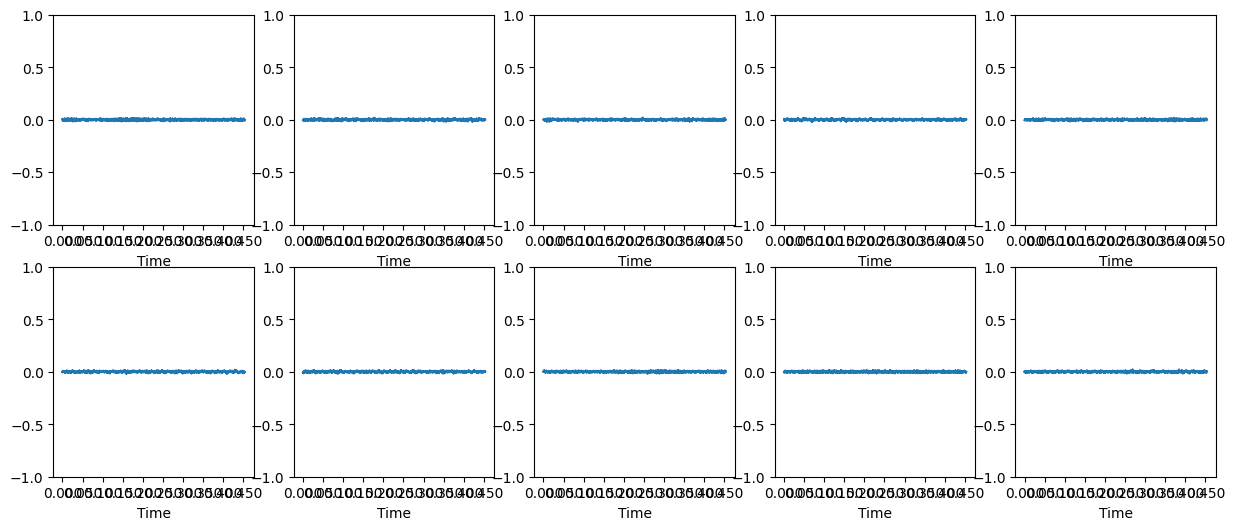

In [82]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

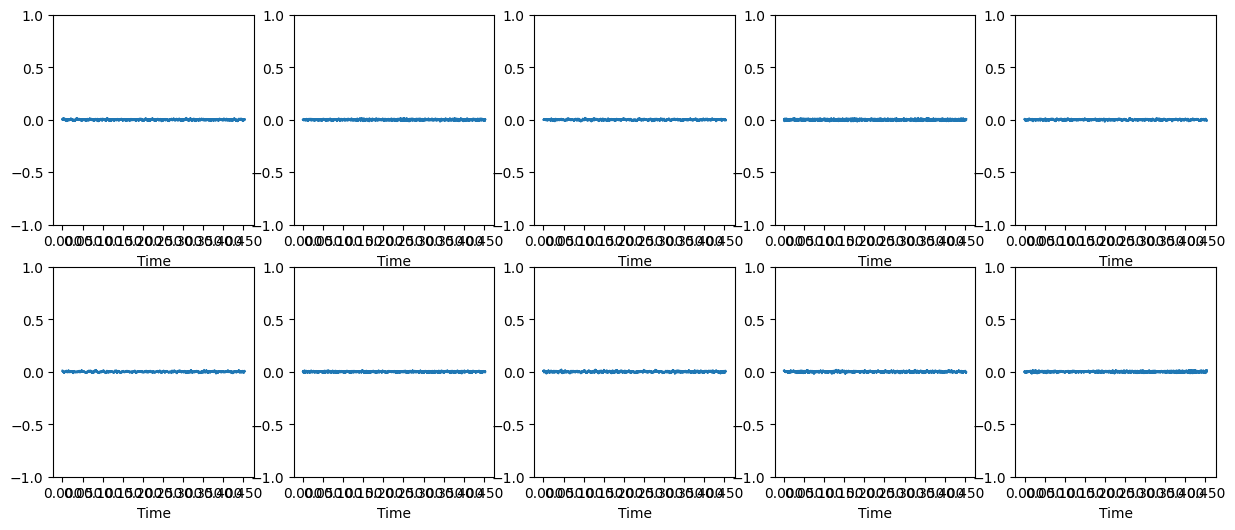

In [83]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [84]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [85]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [86]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [87]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [88]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.68750000e-02 1.81473614e+03]
[4.39453125e-02 2.01874371e+03]
[6.39648438e-02 1.94236052e+03]
[3.75976562e-02 1.51302712e+03]


Text(0, 0.5, 'Count')

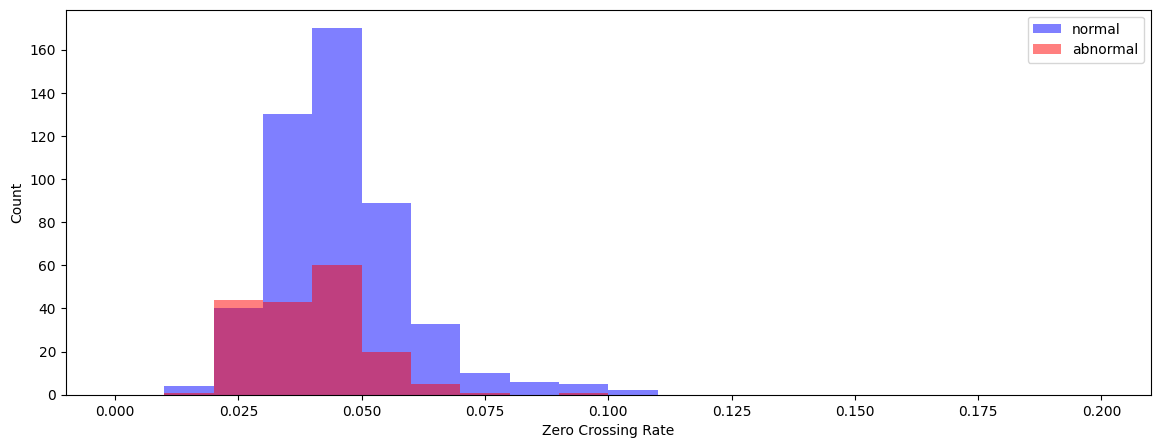

In [89]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

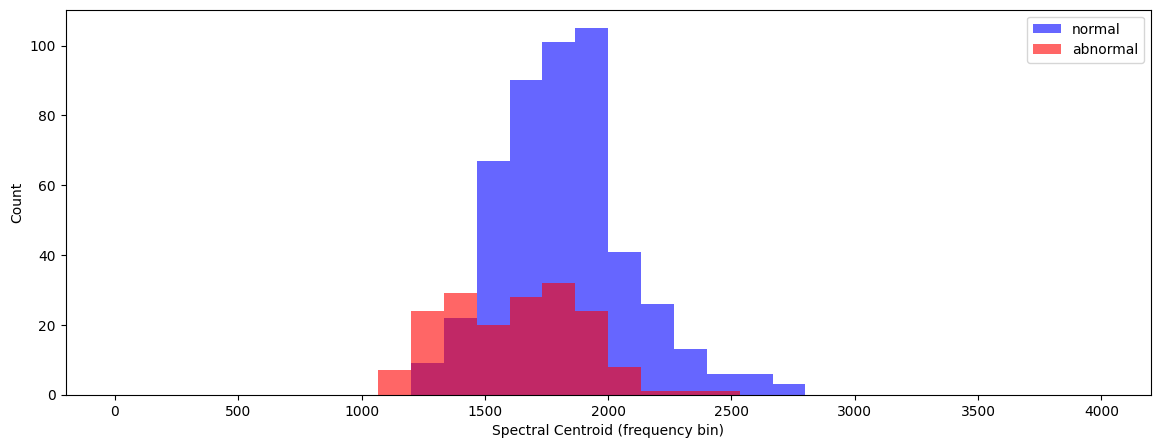

In [90]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [94]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [97]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [98]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [99]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

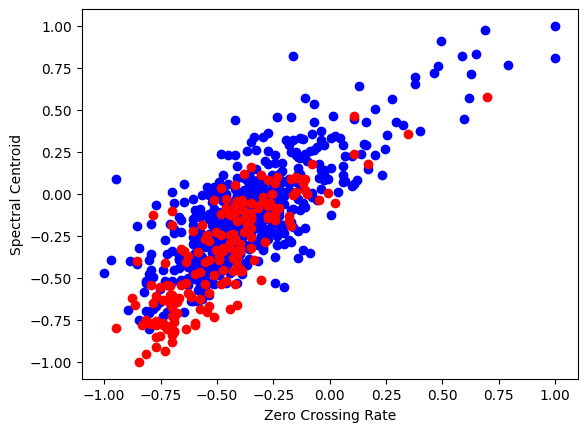

In [100]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [101]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [102]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [103]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [104]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [105]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [106]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [107]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [108]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [109]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3403 - loss: 0.7666 - val_accuracy: 0.3253 - val_loss: 0.7570
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5006 - loss: 0.6981 - val_accuracy: 0.4337 - val_loss: 0.7022
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5732 - loss: 0.6645 - val_accuracy: 0.7229 - val_loss: 0.6589
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7425 - loss: 0.6177 - val_accuracy: 0.7410 - val_loss: 0.6259
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7207 - loss: 0.6081 - val_accuracy: 0.7229 - val_loss: 0.6062
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7448 - loss: 0.5776 - val_accuracy: 0.7169 - val_loss: 0.5946
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7506 - loss: 0.5766 - val_accuracy: 0.7169 - val_loss: 0.5869
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7367 - loss: 0.5621 - val_accu

In [111]:
import plotly
import plotly.graph_objs as go

In [112]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [113]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

#CNN Model

In [114]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [120]:
file_name = '/content/drive/MyDrive/DST/train/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


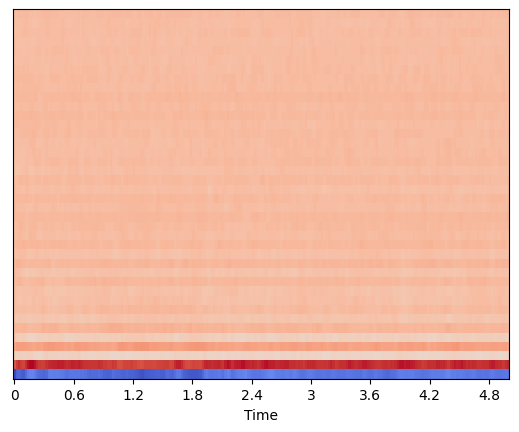

In [121]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [122]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [123]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [124]:
normal_train_features[0].shape

(40, 216)

In [125]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


#Lab Week8

In [126]:
file_name = '/content/drive/MyDrive/DST/test/test/a_00000020_0.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


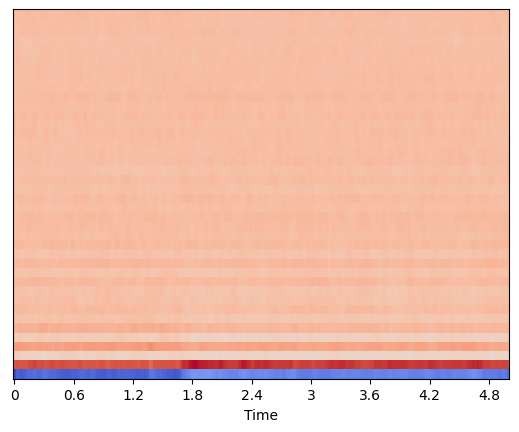

In [127]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [128]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [129]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)


In [130]:
normal_train_features[0].shape

(40, 216)

In [131]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [132]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [133]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [134]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [135]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [136]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [137]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [138]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [139]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [140]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [141]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [142]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.6221 - loss: 5.0215
Epoch 1: val_loss improved from inf to 0.93929, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 874ms/step - accuracy: 0.6213 - loss: 4.9713 - val_accuracy: 0.7169 - val_loss: 0.9393
Epoch 2/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7445 - loss: 1.5477
Epoch 2: val_loss improved from 0.93929 to 0.57099, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7449 - loss: 1.5371 - val_accuracy: 0.7831 - val_loss: 0.5710
Epoch 3/50
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5741 - loss: 0.9481
Epoch 3: val_loss improved from 0.57099 to 0.52211, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5891 - loss: 0.9287 - val_accuracy: 0.7169 - val_loss: 0.5221
Epoch 4/50
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7836 - loss: 0.4929
Epoch 4: val_loss improved from 0.52211 to 0.50160, saving

In [143]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [144]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [145]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [146]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")

Training  - loss: 0.1976, acc: 0.9458
Validation- loss: 0.2128, acc: 0.9398


In [147]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


In [148]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[118   1]
 [  9  38]]


In [149]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9291    0.9916    0.9593       119
    abnormal     0.9744    0.8085    0.8837        47

    accuracy                         0.9398       166
   macro avg     0.9517    0.9001    0.9215       166
weighted avg     0.9419    0.9398    0.9379       166



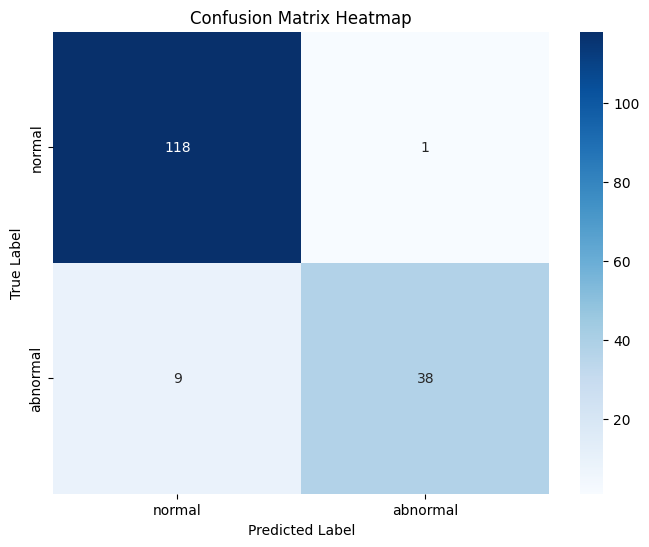

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()